## Исследование данных о российском кинопрокате



Заказчик этого исследования — Министерство культуры Российской Федерации.

Необходимо изучить рынок российского кинопроката и выявить текущие тренды. Уделить внимание фильмам, которые получили государственную поддержку. Попробовать ответить на вопрос, насколько такие фильмы интересны зрителю.

Работать будем с данными, опубликованными на портале открытых данных Министерства культуры. Набор данных содержит информацию о прокатных удостоверениях, сборах и государственной поддержке фильмов, а также информацию с сайта КиноПоиск.

### Шаг 1. Откройте файлы с данными и объедините их в один датафрейм. 

Объедините данные таким образом, чтобы все объекты из датасета `mkrf_movies` обязательно вошли в получившийся датафрейм. 

<div id="accordion">
    <div class="card">
        <div class="card-header" id="headingThree">
            <button class="btn btn-link collapsed" data-toggle="collapse" data-target="#collapseHint_0" aria-expanded="false" aria-controls="collapseHint_0">Подсказка</button>
        </div>
        <div id="collapseHint_0" class="collapse" aria-labelledby="headingThree" data-parent="#accordion">
            <div class="card-body">
Обратите внимание на тип данных столбца, по которому будете соединять датафреймы. Тип данных этих столбцов должен быть одинаковым в обоих датафреймах.
            </div>
        </div>
    </div>
</div>

In [1]:
#импорт библиотеку matplotlib для построения графиков
import matplotlib.pyplot as plt

#импорт бибилиотеки pandas
import pandas as pd

import seaborn as sns

import numpy as np

pd.set_option('display.float_format', '{:,.2f}'.format)
#Сброс ограничений на число столбцов
pd.set_option('display.max_columns', None)
#чтение файла с данными и сохранение в переменной data1 и data2 
data1 = pd.read_csv('/datasets/mkrf_movies.csv')
data2 = pd.read_csv('/datasets/mkrf_shows.csv')



In [2]:
#вывод data1
data1.head()


,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама"
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный"
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер"


In [3]:
#вывод data2
data2

,puNumber,box_office
0,111000113,"2,450.00"
1,111000115,"61,040.00"
2,111000116,"153,030,013.40"
3,111000117,"12,260,956.00"
4,111000118,"163,684,057.79"
...,...,...
3153,224014814,"1,530.00"
3154,224021411,"9,270.00"
3155,224022410,400.00
3156,224023210,360.00


In [4]:
#общая информация по data1
data1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7486 entries, 0 to 7485
Data columns (total 15 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
dtypes: float64(3), object(12)
memory usage: 877.4+ KB


In [5]:
#общая информация по data2
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null int64
box_office    3158 non-null float64
dtypes: float64(1), int64(1)
memory usage: 49.5 KB


Видим, что общий столбец data1 и data2 имеет разный тип, поэтому приведем его к одному типу - str, чтобы объединить данные этих двух таблиц в одну.

In [6]:
#замена типа данных в столбце 'puNumber' таблицы data2
data1['puNumber'] = data1.puNumber.astype('str')

In [7]:
#замена типа данных в столбце 'puNumber' таблицы data2
data2['puNumber'] = data2.puNumber.astype('str')

In [8]:
#проверим
data2.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3158 entries, 0 to 3157
Data columns (total 2 columns):
puNumber      3158 non-null object
box_office    3158 non-null float64
dtypes: float64(1), object(1)
memory usage: 49.5+ KB


In [9]:
#объединим data1 и data2 по столбцу 'puNumber' в таблицу data
data = data1.merge(data2, on='puNumber', how='left')

In [10]:
#проверим объединение выводом таблицы data
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.2,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.6,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.8,"фантастика,боевик,триллер",nan


In [11]:
#получение общей информации о данных в таблице 
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7486 entries, 0 to 7485
Data columns (total 16 columns):
title                    7486 non-null object
puNumber                 7486 non-null object
show_start_date          7486 non-null object
type                     7486 non-null object
film_studio              7468 non-null object
production_country       7484 non-null object
director                 7477 non-null object
producer                 6918 non-null object
age_restriction          7486 non-null object
refundable_support       332 non-null float64
nonrefundable_support    332 non-null float64
budget                   332 non-null float64
financing_source         332 non-null object
ratings                  6519 non-null object
genres                   6510 non-null object
box_office               3158 non-null float64
dtypes: float64(4), object(12)
memory usage: 994.2+ KB


In [12]:
#получение некоторых числовых показателей для столбцов с числовыми значениями
data.describe()

,refundable_support,nonrefundable_support,budget,box_office
count,332.00,332.00,332.00,"3,158.00"
mean,"11,864,457.83","48,980,988.89","127,229,716.68","76,478,696.16"
std,"24,916,555.26","59,980,117.92","188,588,333.12","240,353,122.82"
min,0.00,0.00,0.00,0.00
25%,0.00,"25,000,000.00","42,000,000.00","86,239.00"
50%,0.00,"30,000,000.00","68,649,916.00","2,327,987.55"
75%,"15,000,000.00","40,375,000.00","141,985,319.50","23,979,671.02"
max,"180,000,000.00","400,000,000.00","2,305,074,303.00","3,073,568,690.79"


***Вывод п.1:

I. На первый взгляд изучая таблицу возникли следующие вопросы:

1) В столбце 'show_start_date' - дата премьеры фильма. Значение указали в часовом поясе UTC+0, в формате ISO. Значит, сначала идут год, месяц, день; затем буквенный разделитель даты и времени T; затем часы, минуты и секунды.

2) Остальные столбцы сомнений, на первый взгляд, не вызвали.

II. Изучив общую информацию, делаем выводы:

1) В таблице 16 столбцов.

Согласно прилагаемой документации:

title — название фильма;
puNumber — номер прокатного удостоверения;
show_start_date — дата премьеры фильма;
type — тип фильма;
film_studio — студия-производитель;
production_country — страна-производитель;
director — режиссёр;
producer — продюсер;
age_restriction — возрастная категория;
refundable_support — объём возвратных средств государственной поддержки;
nonrefundable_support — объём невозвратных средств государственной поддержки;
financing_source — источник государственного финансирования;
budget — общий бюджет фильма;
ratings — рейтинг фильма на КиноПоиске;
genres — жанр фильма;
box_office — сборы в рублях.


2) Количество значений почти во всех столбцах различается - значит, в данных есть пропущенные значения.

3) Есть столбцы, тип которых не соответствует типу данных:

puNumber - номер прокатного удостоверения - указан типа данных object, хотя номер должен быть в целых числах;

show_start_date - дата премьеры фильма - указан тип object, должен быть тип дата;

ratings - рейтинг фильма на КиноПоиске - указан тип object, должен быть float;


III. Согласно информации некоторых числовых показателей таблицы:

1) тоже подтверждается факт, что очень много столбцов с пропусками;

2) вызвали подозрения некоторые параметры, которые требуют проверки, по следующим столбцам:

- refundable_support - медианное значение равно 0.

### Шаг 2. Предобработка данных

#### Шаг 2.1. Проверьте типы данных

- Проверьте типы данных в датафрейме и преобразуйте их там, где это необходимо.

Есть столбцы, тип которых не соответствует типу данных:

puNumber - номер прокатного удостоверения - указан типа данных object, хотя номер должен быть в целых числах;

show_start_date - дата премьеры фильма - указан тип object, должен быть тип дата;

ratings - рейтинг фильма на КиноПоиске - указан тип object, должен быть float;

В столбце 'ratings' поменять тип данных на float нам мешают строки со знаком '%'. Найдем такие строки и посчитаем их количество.

In [13]:
display(data[data['ratings'].str.contains('%', na=False)])

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
259,Прошлое,221030715,2015-07-29T12:00:00.000Z,Художественный,"20 Сенчюри Фокс де Архентина, Чемо, ЭйчБи Филм...",Аргентина - Бразилия,Эктор Бабенко,"Эктор Бабенко, Оскар Крамер, Хуго Сидмэн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,99%,"ужасы,триллер,драма",nan
811,От винта!,114000212,2012-08-06T12:00:00.000Z,Анимационный,"ЗАО ""Продюсерский центр ""Парадиз""",Россия,О.Лопато,"Г.Нерсисян, А.Манасарян, А.Нерсесян",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,28%,"детский,приключения,комедия","1,740.00"
1053,Песочный человек,121029212,2012-11-29T12:00:00.000Z,Художественный,Спотлайт Медиа Продакшн,Швейцария,Питер Луизи,"Дэвид Луизи, Питер Луизи",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,97%,"ужасы,фантастика,фэнтези",nan
1341,Сказка о добре и Вре,111008913,2013-11-15T12:00:00.000Z,Художественный,"НП ""Студия игрового кино ""Лик""",Россия,Е.Шиляева,К.Терещенко,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,99%,"триллер,драма,детектив",nan
1805,Спираль.,111001014,2014-01-30T12:00:00.000Z,Художественный,"ООО ""Компания Питон""",Россия,А.Волгин,Е.Ковалева,«12+» - для детей старше 12 лет,nan,nan,nan,NaN,99%,"аниме,мультфильм,ужасы","4,295.00"
1874,Короткие истории о любви 2,121002615,2015-02-13T12:00:00.000Z,Художественный,"Кавиар, Курт 13, СтритЛайт Филмз, Нэйер Дойче ...",Нидерланды - США - Германия - Канада - Франция...,"Мэтью Аувро, Лео Брайдл, Бен Бренд, Ден Кларк,...","Мэри Пэт Бентел, Бен Бренд, Сиара Гиллан, Джор...",«18+» - запрещено для детей,nan,nan,nan,NaN,83%,NaN,"1,429,859.00"
1899,Золушка /По сказке Шарля Перро/. Холодное торж...,121003615,2015-02-27T12:00:00.000Z,Художественный,"Женр Филмз, Уолт Дисней Пикчерз",США,Кеннет Брана,"Дэвид Бэррон, Саймон Кинберг, Эллисон Ширмур",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,64%,"мюзикл,фэнтези,мелодрама","528,732,557.70"
2126,Поездка к матери,111002015,2015-03-02T12:00:00.000Z,Художественный,"ЗАО ""Киностудия ""М""-Фильм""",Россия,М.Косырев-Нестеров,М.Косырев-Нестеров,«16+» - для детей старше 16 лет,nan,nan,nan,NaN,91%,"драма,семейный",0.00
2146,Главный,111003415,2015-03-27T12:00:00.000Z,Художественный,"ООО ""Киностудия ""МАСТЕР""",Россия,Ю.Кара,Ю.Кара,«6+» - для детей старше 6 лет,0.00,"10,000,000.00","40,000,000.00",Министерство культуры,94%,"фантастика,боевик,комедия","334,750.00"
2438,Самый рыжий Лис,111012715,2015-07-30T12:00:00.000Z,Художественный,"ООО ""Продюсерский центр ""Ленфильм""",Россия,А.Стреляная,"А.Котелевский, Э.Пичугин",«6+» - для детей старше 6 лет,nan,nan,nan,NaN,62%,"фэнтези,семейный",nan


In [14]:
display(data[data['ratings'].str.contains('%', na=False)].count())

title                    29
puNumber                 29
show_start_date          29
type                     29
film_studio              29
production_country       29
director                 29
producer                 29
age_restriction          29
refundable_support        2
nonrefundable_support     2
budget                    2
financing_source          2
ratings                  29
genres                   26
box_office               15
dtype: int64

Итак, таких строк (с %) - 29, это не очень много. Из них 27 - без государственной поддержки, 2 - с гос.поддержкой, в обоих случаях это небольшой % данных, поэтому разумнее  избавится от этих строк, чтобы не искажать данные в дальнейшем анализе.

In [15]:
index = data[data['ratings'].str.contains('%',na=False)].index
#ratings_pr

In [16]:
data.drop(index, inplace = True)

In [17]:
#проверка
display(data[data['ratings'].str.contains('%', na=False)].count())

title                    0
puNumber                 0
show_start_date          0
type                     0
film_studio              0
production_country       0
director                 0
producer                 0
age_restriction          0
refundable_support       0
nonrefundable_support    0
budget                   0
financing_source         0
ratings                  0
genres                   0
box_office               0
dtype: int64

In [18]:
data['ratings'] = data.ratings.astype('float64')

В столбце 'puNumber' поменять тип данных на int нам мешает одна строчка со значением по столбцу 'puNumber' - 'нет'. Найдем строку с этим значением

In [19]:
data.loc[data['puNumber'] == 'нет', 'puNumber']

1797    нет
Name: puNumber, dtype: object

In [20]:
data.loc[1797]

title                    Курбан-роман. (История с жертвой)
puNumber                                               нет
show_start_date                   2014-05-15T12:00:00.000Z
type                                        Художественный
film_studio                               ФОНД "ИННОВАЦИЯ"
production_country                                  Россия
director                                           С.Юзеев
producer                                        М.Галицкая
age_restriction            «12+» - для детей старше 12 лет
refundable_support                                     NaN
nonrefundable_support                                  NaN
budget                                                 NaN
financing_source                                       NaN
ratings                                                NaN
genres                                                 NaN
box_office                                             NaN
Name: 1797, dtype: object

Данные в столбце 'puNumber' видимо просто не заполнены, восстановить их нет возможности, поэтому заменим это значение на 0.

In [21]:
#заменим значение 'нет' в столбце 'puNumber' на 0

data.loc[1797,'puNumber'] = 0


In [22]:
#проверка
data.loc[1797]

title                    Курбан-роман. (История с жертвой)
puNumber                                                 0
show_start_date                   2014-05-15T12:00:00.000Z
type                                        Художественный
film_studio                               ФОНД "ИННОВАЦИЯ"
production_country                                  Россия
director                                           С.Юзеев
producer                                        М.Галицкая
age_restriction            «12+» - для детей старше 12 лет
refundable_support                                     NaN
nonrefundable_support                                  NaN
budget                                                 NaN
financing_source                                       NaN
ratings                                                NaN
genres                                                 NaN
box_office                                             NaN
Name: 1797, dtype: object

In [23]:
#переведем тип значений столбца puNumber в тип int (целые числа)
data['puNumber'] = data.puNumber.astype('int64')

In [24]:
#проверка
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
title                    7457 non-null object
puNumber                 7457 non-null int64
show_start_date          7457 non-null object
type                     7457 non-null object
film_studio              7439 non-null object
production_country       7455 non-null object
director                 7448 non-null object
producer                 6889 non-null object
age_restriction          7457 non-null object
refundable_support       330 non-null float64
nonrefundable_support    330 non-null float64
budget                   330 non-null float64
financing_source         330 non-null object
ratings                  6490 non-null float64
genres                   6484 non-null object
box_office               3143 non-null float64
dtypes: float64(5), int64(1), object(10)
memory usage: 1.3+ MB


In [25]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27T12:00:00.000Z,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13T12:00:00.000Z,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29T12:00:00.000Z,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan


In [26]:
#перевод данных столбца  в формат даты и отброс времени
data['show_start_date'] = pd.to_datetime(data['show_start_date'], format='%Y-%m-%d')
data['show_start_date'] = data['show_start_date'].dt.date    
data.head()



,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan


In [27]:
data['show_start_date'] = data.show_start_date.astype('datetime64[ns]')

In [28]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7457 entries, 0 to 7485
Data columns (total 16 columns):
title                    7457 non-null object
puNumber                 7457 non-null int64
show_start_date          7457 non-null datetime64[ns]
type                     7457 non-null object
film_studio              7439 non-null object
production_country       7455 non-null object
director                 7448 non-null object
producer                 6889 non-null object
age_restriction          7457 non-null object
refundable_support       330 non-null float64
nonrefundable_support    330 non-null float64
budget                   330 non-null float64
financing_source         330 non-null object
ratings                  6490 non-null float64
genres                   6484 non-null object
box_office               3143 non-null float64
dtypes: datetime64[ns](1), float64(5), int64(1), object(9)
memory usage: 1.3+ MB


Таким образом, мы заменили типу данных у следующих столбцов:

puNumber - номер прокатного удостоверения - в тип int (целые числа);

show_start_date - дата премьеры фильма - в тип дата;

ratings - рейтинг фильма на КиноПоиске - в тип float (вещественные числа).

#### Шаг 2.2. Изучите пропуски в датафрейме

- Объясните, почему заполнили пропуски определённым образом или почему не стали этого делать.

Проверим наличие пропусков и в каких столбцах. Если доля пропусков от 5-15%% - их необходимо проработать.

In [29]:
#подсчет пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    9
producer                  568
age_restriction             0
refundable_support       7127
nonrefundable_support    7127
budget                   7127
financing_source         7127
ratings                   967
genres                    973
box_office               4314
dtype: int64

In [30]:
#вывод долевого соотношения количества пропусков
(data.isna().mean()* 100).round(3).sort_values(ascending=False).\
to_frame().style.background_gradient(cmap='coolwarm')

,0
financing_source,95.575
budget,95.575
nonrefundable_support,95.575
refundable_support,95.575
box_office,57.852
genres,13.048
ratings,12.968
producer,7.617
film_studio,0.241
director,0.121


    Анализируя количество пропусков и их долевое соотношение, видим их в таблице огромное количество.
    
    Самое большое количство пропусков по столбцам, касающимся финансирования: financing_source, budget, nonrefundable_support,refundable_support - 96,9%. Замена пропусков на медиану, среднее и т.д. приведет к искажению данных. Удалить такое количество строк - полный абсурд. Кроме того, перед нами в отношении всех фильмов не ставят задачу проанализировать бюджеты. Поэтому считаю самым разумным решением: оставить все как есть.
    
    По остальным столбцам тоже большое количество пропусков - гораздо больше 15%. Данные в них в основном - это данные типа object, посчитать и заменить их каким-нибудь средним, медианной и т.д. нет возможности; удалить - это слишком большой процент информации, что приведет к ее искажению. Поэтому тут так же делаем вывод - оставить как есть. Если при дальнейшем анализе будет понятно, что по какому из столбцов они мешают расчетам - заменим или избавимся тогда от них позже.


#### Шаг 2.3. Изучите дубликаты в датафрейме
- Проверьте, есть ли в данных дубликаты. Опишите причины, которые могли повлиять на появление дублей.

Подсчитаем явные дубликаты.

In [31]:
#подсчет явных дубликатов
data.duplicated().sum()

0

In [32]:
#соберем все уникальные совпадения столбца 'title'
data['title'].value_counts()

День святого Валентина_          5
Там, где живут чудовища          4
Красавчик-2                      4
Дитя тьмы                        4
Рапунцель: Запутанная история    4
                                ..
Шина667 (Sheena667)              1
Ученик                           1
Людоед (2015)                    1
Попробуй подкати                 1
Иллюзия обмана 2                 1
Name: title, Length: 6743, dtype: int64

In [33]:
#соберем все уникальные совпадения столбца 'puNumber'
data['puNumber'].value_counts()

221054410    2
221154310    2
114001919    1
121023815    1
221025616    1
            ..
111008518    1
121025116    1
111012616    1
111016714    1
0            1
Name: puNumber, Length: 7455, dtype: int64

In [34]:
data['title'].duplicated().sum()

714

In [35]:
data[['title','puNumber']].duplicated().sum()

0

In [36]:
data[['puNumber']].duplicated().sum()

2

In [37]:
#вывод строк, где одинаковые номера прокатных удостоверений
data.loc[data['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
5067,Анализируй это!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Вилладж Роудшоу Филмз ЛТД",США-Австралия,ХЭрольд Рэмис,"Джейн Розенталь, Пола Уейнстейн",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.40,"комедия,криминал",nan
5068,Анализируй то!,221054410,2010-05-25,Художественный,"Уорнер Бразерс, Виллидж Роадшоу Пикчерз, Эн-Пи...",США,Гарольд Реймис,"Джейн Розенталь, Паул Уэйнстейн",«12+» - для детей старше 12 лет,nan,nan,nan,NaN,6.80,"комедия,криминал",nan


In [38]:
#вывод строк, где одинаковые номера прокатных удостоверений
data.loc[data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
4638,Как жениться и остаться холостым,221154310,2010-12-17,Художественный,"Ше Вам, Скрипт Ассосье, Тэ Фэ 1 Фильм Продюксь...",Франция,Эрик Лартиго,"Амандин Било, Алан Шаба",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.00,"мелодрама,комедия",nan
4639,Иоанна - женщина на папском престоле /По роман...,221154310,2010-12-17,Художественный,"Константин Фильм, А Эр Ди Дегето Фильм, Дюне ...",Германия - Великобритания - Италия - Испания,Зенке Вортманн,"Оливер Бербен, Дорис Д.Хайнце, Фарук Элтан",«16+» - для детей старше 16 лет,nan,nan,nan,NaN,7.60,"драма,мелодрама,история",nan


In [39]:
#удаление строк с одинаковыми номерами прокатных удостоверений
data = data.drop([5067, 5068, 4638, 4639])

In [40]:
#проверка
data.loc[data['puNumber'] == 221054410]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


In [41]:
#проверка
data.loc[data['puNumber'] == 221154310]

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office


Таким образом, в таблице отсутствуют явные дубликаты. Мы проверили: есть много совпадающих значений, например, название фильмов или номер прокатного удостоверения, но если сравнивать их по строкам - то в них есть различия. Считаю, что разбираться нужно только с явными дубликатами в данных, а если таких нет - оставляем все как есть в исходных. Но в данных найдены две строки, где одинаковым прокатным удостоверениям соответствуют разные фильмы - этот момент считаю аномальным, поэтому решила, что разумнее все эти строки удалить.

#### Шаг 2.4. Изучите категориальные значения

- Посмотрите, какая общая проблема встречается почти во всех категориальных столбцах;
- Исправьте проблемные значения в поле `type`.


In [42]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan


К столбцам с категориальными значениями можно отнести:

- type
- age_restriction
- genres

Проверим данные в этих столбцах.

In [43]:
#соберем все уникальные совпадения столбца 'type'
data['type'].value_counts()

Художественный                4500
 Художественный               1383
Анимационный                   826
Прочие                         404
Документальный                 285
Научно-популярный               53
 Анимационный                    1
Музыкально-развлекательный       1
Name: type, dtype: int64

In [44]:
#соберем все уникальные совпадения столбца 'age_restriction'
data['age_restriction'].value_counts()

«16+» - для детей старше 16 лет           2840
«18+» - запрещено для детей               1598
«12+» - для детей старше 12 лет           1586
«0+» - для любой зрительской аудитории     809
«6+» - для детей старше 6 лет              620
Name: age_restriction, dtype: int64

In [45]:
#соберем все уникальные совпадения столбца 'genres'
data['genres'].value_counts()

драма                               472
комедия                             351
мелодрама,комедия                   221
драма,мелодрама,комедия             189
драма,мелодрама                     183
                                   ... 
фантастика,боевик,ужасы               1
мультфильм,короткометражка,ужасы      1
вестерн,приключения,боевик            1
комедия,приключения,спорт             1
боевик,история                        1
Name: genres, Length: 739, dtype: int64

Сразу бросается в глаза, что в поле type есть 2 значения, у которых появился пробел в начале строки. Приведем эти значения к нормальному виду.

In [46]:
#изменим тип данных на str, т.к. метод lstrip работает только со строками
data['type'] = data['type'].astype('str')

In [47]:
#напишем функцию type_unique
def type_unique (value):
    """"
    Функция возвращает строку без пробела впереди
    """
    return value.lstrip()

#применим функцию к столбцу 'type'
data['type'] = data['type'].apply(type_unique)


  

In [48]:
#проверим результат
data['type'].value_counts()

Художественный                5883
Анимационный                   827
Прочие                         404
Документальный                 285
Научно-популярный               53
Музыкально-развлекательный       1
Name: type, dtype: int64

Итак, мы исправили значения в столбце 'type', которые имели пробелы впереди строки. Остальные столбцы с категориальными значениями сомнений не вызвали. 

#### Шаг 2.5. Проверьте количественные значения

- Проверьте, обнаружились ли в таких столбцах подозрительные данные. Как с такими данными лучше поступить?



Согласна описанию данных столбец 'budget'  - общий бюджет фильма, поэтому значения в этом столбце должны быть не меньше суммы значений столбцов 'refundable_support' и 'nonrefundable_support'. Проверим есть ли столбцы, которые противоречат этому условию.

In [49]:
#выведем на экран срез таблицы, где значения столбца 'budget' меньше суммы значений столбцов 
#'refundable_support' и 'nonrefundable_support'
data.query('refundable_support != "nan" and nonrefundable_support != "nan" and budget != "nan" \
and budget <= refundable_support + nonrefundable_support')
     

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00",0.00,"Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10"
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00",0.00,Фонд кино,6.60,драма,"446,163,511.00"
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00",0.00,Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40"
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,0.00,Фонд кино,6.20,"комедия,фэнтези","67,418,974.80"
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00",0.00,Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40"
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00",0.00,Фонд кино,6.30,"комедия,драма","1,957,738.51"
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00",0.00,Фонд кино,5.10,"комедия,мелодрама","72,937,783.20"
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00",0.00,Министерство культуры,4.30,комедия,"15,362,931.43"
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00",0.00,Фонд кино,6.30,"комедия,мелодрама","70,299,052.00"
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00",0.00,Фонд кино,5.60,фантастика,"1,038,321,489.00"


Действительно, столбцы противоречащие условию (значения в столбце 'budget' должны быть не меньше суммы значений столбцов 'refundable_support' и 'nonrefundable_support') есть в таблице и это аномалия. Поэтому заменим подобные аномалии в столбце 'budget' на значение суммы столбцов 'refundable_support' и 'nonrefundable_support'. Этот вариант не дает нам, конечно, стопроцентной гарантии в точности результата, но по крайней мере это не противоречит здравому смыслу и уже не является аномалией.

In [50]:
#создадим новый столбец 'budget_refun', значения которого равны 
# сумме значений столбцов 'refundable_support' и 'nonrefundable_support'
data['budget_refun'] = data['refundable_support'] + data['nonrefundable_support']

In [51]:
#проверим
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan


In [52]:
#заменим аномальные значения в столбце 'budget' 
#на сумму значений столбцов 'refundable_support' и 'nonrefundable_support'
data.loc[data['budget'] < data['budget_refun'], 'budget'] \
= data['refundable_support'] + data['nonrefundable_support']

In [53]:
#проверим
data.query('refundable_support != "nan" and nonrefundable_support != "nan" and budget != "nan" \
and budget <= refundable_support + nonrefundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun
2053,14+,111023614,2014-12-19,Художественный,"ООО Киностудия ""Сентябрь""",Россия,А.Зайцев,"О.Гранина, А.Зайцев",«16+» - для детей старше 16 лет,0.00,"23,000,000.00","23,000,000.00","Министерство культуры, Фонд кино",6.60,мелодрама,"10,234,016.10","23,000,000.00"
2058,Дуxless 2,111000415,2015-01-26,Художественный,"ООО ""Киностудия ""Слово"", ООО ""Арт Пикчерс Студия""",Россия,Р.Прыгунов,"П.Ануров, Ф.Бондарчук, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"75,000,000.00","75,000,000.00",Фонд кино,6.60,драма,"446,163,511.00","75,000,000.00"
2472,Воин (2015),111017315,2015-09-28,Художественный,"ООО ""Форпост Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,А.Андрианов,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,"10,000,000.00","70,000,000.00","80,000,000.00",Фонд кино,7.80,"боевик,драма,криминал","196,572,438.40","80,000,000.00"
2532,Бармен.,111009615,2015-05-26,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Штурманова,Т.Вайнштейн,«16+» - для детей старше 16 лет,"20,000,000.00",0.00,"20,000,000.00",Фонд кино,6.20,"комедия,фэнтези","67,418,974.80","20,000,000.00"
2615,Савва. Сердце воина,114001715,2015-07-21,Анимационный,"ООО ""Глюкоза Продакшн"", ООО ""Арт Пикчерс Студия""",Россия,М.Фадеев,А.Чистяков,«6+» - для детей старше 6 лет,"60,000,000.00","100,000,000.00","160,000,000.00",Фонд кино,4.60,"мультфильм,приключения,фэнтези","184,487,551.40","160,000,000.00"
2684,Тряпичный союз,111010215,2015-06-08,Художественный,"ООО ""Кинокомпания ""КОКТЕБЕЛЬ""",Россия,М.Местецкий,"Р.Борисевич, А.Кушаев",«18+» - запрещено для детей,0.00,"59,000,000.00","59,000,000.00",Фонд кино,6.30,"комедия,драма","1,957,738.51","59,000,000.00"
2788,Срочно выйду замуж,111017115,2015-09-30,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,С Чекалов,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,0.00,"35,000,000.00","35,000,000.00",Фонд кино,5.10,"комедия,мелодрама","72,937,783.20","35,000,000.00"
2874,Помню - не помню!,111004916,2016-03-01,Художественный,"ООО ""КиноФирма""",Россия,В.Ровенский,"ООО ""КиноФирма""",«12+» - для детей старше 12 лет,0.00,"6,000,000.00","6,000,000.00",Министерство культуры,4.30,комедия,"15,362,931.43","6,000,000.00"
3047,Любовь с ограничениями,111008216,2016-04-29,Художественный,"АО ""ВайТ Медиа"", ООО ""Арт Пикчерс Студия""",Россия,Д.Тюрин,"Ф.Бондарчук, Т.Вайнштейн, Д.Рудовский",«16+» - для детей старше 16 лет,"19,000,000.00","51,000,000.00","70,000,000.00",Фонд кино,6.30,"комедия,мелодрама","70,299,052.00","70,000,000.00"
3565,Притяжение (2016),111018116,2016-12-16,Художественный,"ООО ""Водород 2011"", ООО ""Арт Пикчерс Студия""",Россия,Ф.Бондарчук,"ООО ""Арт Пикчерс Студия""",«12+» - для детей старше 12 лет,0.00,"250,000,000.00","250,000,000.00",Фонд кино,5.60,фантастика,"1,038,321,489.00","250,000,000.00"


In [54]:
#проверим
data.query('refundable_support != "nan" and nonrefundable_support != "nan" and budget != "nan" \
and budget != refundable_support + nonrefundable_support')

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00"
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,NaN,"28,140.00","26,000,000.00"
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00"
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00"
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00"
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00"
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00"
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",nan,"500,000,000.00"
7476,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,nan,"30,000,000.00"


#### Шаг 2.6. Добавьте новые столбцы





- Создайте столбец с информацией о годе проката. Выделите год из даты премьеры фильма.

In [55]:
#добавим столбец с годом выхода фильма в прокат
data['year'] = data['show_start_date'].dt.year

In [56]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015


In [57]:
#переведем значения в столбце 'year' в целые числа
data['year'] = data.year.astype('Int64')

In [58]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 7453 entries, 0 to 7485
Data columns (total 18 columns):
title                    7453 non-null object
puNumber                 7453 non-null int64
show_start_date          7453 non-null datetime64[ns]
type                     7453 non-null object
film_studio              7435 non-null object
production_country       7451 non-null object
director                 7444 non-null object
producer                 6885 non-null object
age_restriction          7453 non-null object
refundable_support       330 non-null float64
nonrefundable_support    330 non-null float64
budget                   330 non-null float64
financing_source         330 non-null object
ratings                  6486 non-null float64
genres                   6480 non-null object
box_office               3143 non-null float64
budget_refun             330 non-null float64
year                     7453 non-null Int64
dtypes: Int64(1), datetime64[ns](1), float64(6), int64(1),

In [59]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015


- Создайте два столбца: с именем и фамилией главного режиссёра и основным жанром фильма. В столбцы войдут первые значения из списка режиссёров и жанров соответственно.



Для дальнейшего анализа и расчетов столбцов 'director' и 'genres' нам мешает большое количество пропусков - пришло время от них избавиться, но чтобы не лишиться строк с важными данными, заполним пропущенные значения в столбцах нулями, так как другими более логичными значениями заполнить нет возможности. Так же для выделения подстроки в строке необходимо перевести тип данных в тип str.

In [60]:
#заполним пропуски в столбце 'director' нулями
data['director'] = data['director'].fillna('unknown')

In [61]:
#заполним пропуски в столбце 'genres' нулями
data['genres'] = data['genres'].fillna('unknown')

In [62]:
#проверка пропусков
data.isna().sum()

title                       0
puNumber                    0
show_start_date             0
type                        0
film_studio                18
production_country          2
director                    0
producer                  568
age_restriction             0
refundable_support       7123
nonrefundable_support    7123
budget                   7123
financing_source         7123
ratings                   967
genres                      0
box_office               4310
budget_refun             7123
year                        0
dtype: int64

In [63]:
#замена типа данных в столбце 'director' на тип str
data['director'] = data.director.astype('str')

In [64]:
#замена типа данных в столбце 'genres'на тип str
data['genres'] = data.genres.astype('str')

In [65]:
#создадим функцию для выделения подстроки в строке
def dir_genr (row):
    """
    Создадим функцию, которая:
    - принимает строку с запятой
    - делит ее на части, с учетом запятой
    - возвращает подстроку до первой запятой
    """
    splitted_text = row.split(',')
    return splitted_text[0]
    

#создадим новый столбец с имененим и фамилией первого режиссера
data['dir'] = data['director'].apply(dir_genr)    

data.head()



,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов


In [66]:
#создадим новый столбец с жанром фильма
data['genr'] = data['genres'].apply(dir_genr)    

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика


- Посчитайте, какую долю от общего бюджета фильма составляет государственная поддержка.

In [67]:
#найдем долю гос.поддержки от общего бюджета фильма
def refund_sup (row):
    """
    Создадим функци, которая возвращает расчет соотношения общего бюджета и гос.поддержки фильма 
    """
    refundable_support = row['refundable_support']
    nonrefundable_support = row['nonrefundable_support']
    budget = row['budget']
    
    return ((refundable_support + nonrefundable_support) / budget)*100

#создадим новый столбец с результатами работы функции 'refund_sup'
data['refund_sup'] = data.apply(refund_sup, axis=1)

#проверка
data.query('refund_sup != "nan" and refund_sup != 100').head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,33.37
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,unknown,"28,140.00","26,000,000.00",2014,А.Якимчук,unknown,70.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,61.27
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,62.48


Добавим еще один новый столбец в таблице, который содержит результат рассчета окупаемости фильма.

In [68]:
#новый столбец 'roi' - окупаемость фильма
data['roi'] = data['box_office'] / data['budget']

In [69]:
data.loc[data['roi'].isna() == False].head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,33.37,0.00
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,unknown,"28,140.00","26,000,000.00",2014,А.Якимчук,unknown,70.00,0.00
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,61.27,0.11
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,0.00
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,62.48,0.01


*** Вывод п.2.

I.
    В таблицы были столбцы, тип которых не соответствует типу данных. Поэтому мы заменили типу данных у следующих столбцов:
puNumber - номер прокатного удостоверения - в тип int (целые числа);
show_start_date - дата премьеры фильма - в тип дата;
ratings - рейтинг фильма на КиноПоиске - в тип float (вещественные числа).

    В столбце 'ratings' поменять тип данных на float нам мешали строки со знаком '%'. Таких строк (с %) - 29, это не очень много. Из них 27 - без государственной поддержки, 2 - с гос.поддержкой, в обоих случаях это небольшой % данных, поэтому разумнее было избавится от этих строк, чтобы не искажать данные в дальнейшем анализе.

    В столбце 'puNumber' поменять тип данных на int нам помешала одна строчка со значением - 'нет'. Эта строчка, видимо, просто не заполнена, восстановить ее нет возможности, поэтому заменили это значение на 0.



II.
    Анализируя количество пропусков и их долевое соотношение, видно, что их в таблице огромное количество.

    Самое большое количство пропусков по столбцам, касающимся финансирования: financing_source, budget, nonrefundable_support,refundable_support - 96,9%. Замена пропусков на медиану, среднее и т.д. приведет к искажению данных. Удалить такое количество строк - полный абсурд. Кроме того, перед нами в отношении всех фильмов не ставят задачу проанализировать бюджеты. Поэтому самым разумным решением было оставить все как есть.
    
    По остальным столбцам тоже большое количество пропусков - гораздо больше 15%. Данные в них в основном - это данные типа object, посчитать и заменить их каким-нибудь средним, медианной и т.д. нет возможности; удалить - это слишком большой процент информации, что приведет к ее искажению. Поэтому тут так же делаем вывод - оставить как есть. Если при дальнейшем анализе будет понятно, что по какому то из столбцов они мешают расчетам - заменим или избавимся тогда от них позже.

III.
    В таблице отсутствуют явные дубликаты. Мы проверили: есть много совпадающих значений, например, название фильмов или номер прокатного удостоверения, но если сравнивать их по строкам - то в них есть различия. Поэтому, считаю, что разбираться нужно только с явными дубликатами в данных, а если таких нет - оставляем все как есть в исходных.

IV.
    К столбцам с категориальными значениями можно отнести:

- type
- age_restriction
- genres


    Исправили значения в столбце 'type', которые имели пробелы впереди строки. Остальные столбцы с категориальными значениями сомнений не вызвали. 

V.
    Согласна описанию данных столбец 'budget' - общий бюджет фильма, поэтому значения в этом столбце должны быть не меньше суммы значений столбцов 'refundable_support' и 'nonrefundable_support'.  Действительно, столбцы противоречащие условию (значения в столбце 'budget' должны быть не меньше суммы значений столбцов 'refundable_support' и 'nonrefundable_support') есть в таблице и это аномалия. Поэтому подобные аномалии в столбце 'budget' заменили на значение суммы столбцов 'refundable_support' и 'nonrefundable_support'. Этот вариант не дает нам, конечно, стопроцентной гарантии в точности результата, но по крайней мере это не противоречит здравому смыслу и уже не является аномалией.

VI. 
    Создали  столбец 'year' с информацией о годе проката. Выделили год из даты премьеры фильма.

    Для создания двух новых столбцов 'dir' и 'genr': с именем и фамилией главного режиссёра и основным жанром фильма, нам мешало большое количество пропусков по  столбцам’ director' и 'genres' , чтобы не лишиться строк с важными данными, мы заполнили пропущенные значения в столбцах нулями, так как другими более логичными значениями заполнить нет возможности. Так же для операции выделения подстроки в строке было необходимо перевести тип данных в тип str, что мы и сделали.

    Создали так же новый столбец 'refund_sup', который отображает: какую долю от общего бюджета фильма составляет государственная поддержка. И новый столбец 'roi' - окупаемость фильма.

### Шаг 3. Проведите исследовательский анализ данных


- Посмотрите, сколько фильмов выходило в прокат каждый год. Обратите внимание, что данные о прокате в кинотеатрах известны не для всех фильмов. Посчитайте, какую долю составляют фильмы с указанной информацией о прокате в кинотеатрах.

In [70]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик,nan,nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма,nan,nan
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика,nan,nan


Сгруппируем все количество вышедших фильмов по годам и проанализируем динамику.

,title
year,
2010,980
2011,621
2012,591
2013,629
2014,806
2015,697
2016,813
2017,503
2018,888


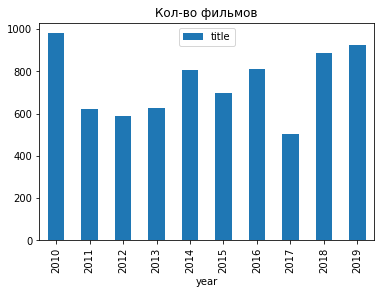

In [71]:
#построим сводную таблицу, по годам выхода фильма в прокат и количества фильмов в эти годы
year_group = data.pivot_table(index = 'year', values = 'title', aggfunc ='count')\
.sort_values( by='year')

display(year_group)

#построим столбчатую диаграмму
year_group.plot(y='title', kind='bar', title=('Кол-во фильмов'))

Анализируя диаграмму "Количество фильмов", можно сделать вывод: самый большой выпуск фильмов отмечается в 2010 году, затем идет резкий спад, потом в течении 7 лет постоянные колебания и с 2018 года рост выпуска фильмов. Причины на данном этапе исследования таких колебаний пока не известны, здесь мы только можем констатировать факты.

Проанализируем количество фильмов по годам, которые имели прокат в кинотеатрах, т.е. имеют сборы. 

,box_office
year,
2010,105
2011,109
2012,127
2013,184
2014,278
2015,460
2016,523
2017,356
2018,474


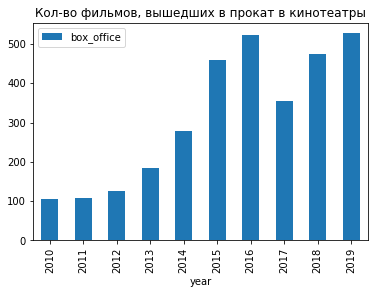

In [72]:
#построим сводную таблицу, по годам выхода фильма в прокат и количества фильмов в эти годы
year_group_box = data.loc[data['box_office'].isna() == False]\
.pivot_table(index = 'year', values = 'box_office', aggfunc ='count')\
.sort_values( by='year')

display(year_group_box)

#построим столбчатую диаграмму
year_group_box.plot(y='box_office', kind='bar', title=('Кол-во фильмов, вышедших в прокат в кинотеатры'))

По диаграмме "Количество фильмов, вышедших в прокат в кинотеатры" можем заметить рост количества фильмов, которые имели прокат в кинотеатрах, за последние 10 лет. Было падение этого показателя в 2017 году, но в последующие годы так же отмечается рост.

Проанализируем долю фильмов, которые выходили в прокат в кинотеатрах, в общем объеме выпущенных фильмов за последний 10 лет.

In [73]:
#объединим year_group и year_group_box по столбцу 'year' в таблицу year_group_box_count
year_group_box_count = year_group.merge(year_group_box, on='year', how='left')

In [74]:
year_group_box_count

,title,box_office
year,,
2010,980,105
2011,621,109
2012,591,127
2013,629,184
2014,806,278
2015,697,460
2016,813,523
2017,503,356
2018,888,474


In [75]:
#создадим новый столбец box_title_% - доля фильмов, вышедших в прокат
year_group_box_count['box_title_%'] = (year_group_box_count['box_office'] / year_group_box_count['title'])*100

,title,box_office,box_title_%
year,,,
2010,980,105,10.71
2011,621,109,17.55
2012,591,127,21.49
2013,629,184,29.25
2014,806,278,34.49
2015,697,460,66.00
2016,813,523,64.33
2017,503,356,70.78
2018,888,474,53.38


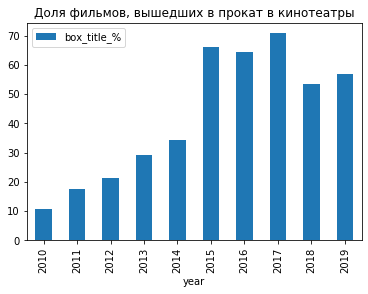

In [76]:
display(year_group_box_count)

#построим столбчатую диаграмму
year_group_box_count.plot(y='box_title_%', kind='bar', title=('Доля фильмов, вышедших в прокат в кинотеатры'))

В принципе, согласно диаграмме "Доля фильмов, вышедших в прокат в кинотеатры", отмечается рост этого показателя на протяжении 8 лет, в 2018 году виден резкий спад, но все же к концу исследуемого периода так же отмечается рост. 

- Изучите, как менялась динамика проката по годам. В каком году сумма сборов была минимальной? А максимальной?

,box_office
year,
2010,"2,428,654.00"
2011,"14,102,765.00"
2012,"6,953,683.00"
2013,"29,799,706.20"
2014,"7,444,947,564.20"
2015,"38,966,066,659.70"
2016,"47,862,924,556.91"
2017,"48,563,669,257.51"
2018,"49,666,815,912.81"


Text(0.5, 1.0, 'Динамика сборов от проката фильмов по годам')

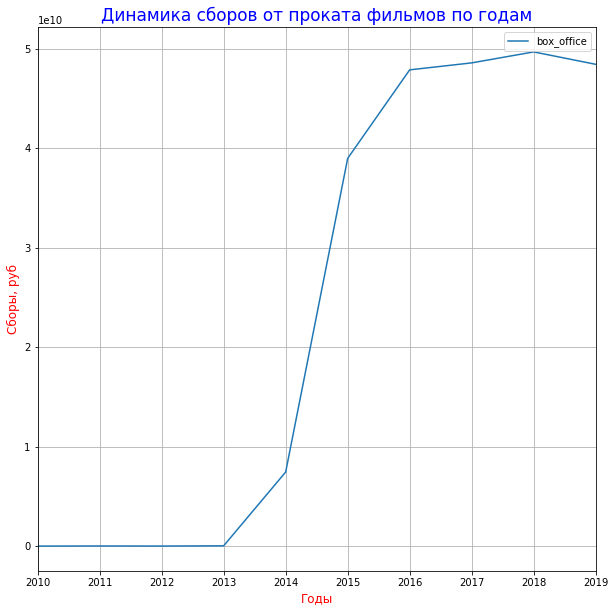

In [77]:
#построим сводную таблицу, по годам выхода фильма в прокат и количества фильмов в эти годы
year_sum_box = data.loc[data['box_office'].isna() == False]\
.pivot_table(index = 'year', values = 'box_office', aggfunc ='sum')\
.sort_values( by='year')

display(year_sum_box)

#построим график
year_sum_box.plot(grid=True, figsize=(10, 10))
plt.xlabel('Годы', fontsize = 12, color = 'red')
plt.ylabel('Сборы, руб', fontsize = 12, color = 'red')
plt.title('Динамика сборов от проката фильмов по годам', fontsize = 17, color = 'blue')

По графику "Динамика сборов от проката фильмов по годам" видно, что с 2010 - 2013 гг. сборы от прокатов фильмов в кинотеатрах были очень малы, резкий рост начинается с 2014 года и доходит до максимума в 2018 году. В 2019 году отмечается небольшое, но снижение этого показателя. Видимо, изменилось качество фильмов и люди стали больше ходить в кинотеатры.

- С помощью сводной таблицы посчитайте среднюю и медианную сумму сборов для каждого года.

In [78]:
#построим сводную таблицу, для подсчета средней и медианной суммы сборов для каждого года
year_mean_box = data.loc[data['box_office'].isna() == False]\
.pivot_table(index = 'year', values = 'box_office', aggfunc = ['sum', 'mean', 'median'])\
.sort_values( by='year')

display(year_mean_box)



,sum,mean,median
,box_office,box_office,box_office
year,,,
2010,"2,428,654.00","23,130.04","1,700.00"
2011,"14,102,765.00","129,383.17","3,000.00"
2012,"6,953,683.00","54,753.41","5,760.00"
2013,"29,799,706.20","161,954.92","3,522.50"
2014,"7,444,947,564.20","26,780,386.92","18,885.00"
2015,"38,966,066,659.70","84,708,840.56","5,003,450.15"
2016,"47,862,924,556.91","91,516,108.14","4,000,811.00"
2017,"48,563,669,257.51","136,414,801.29","10,177,833.50"


Согласно построенной сводной таблицы рассчета средней и медианной суммы сборов для каждого года видна аналогичная динамика как и по сборам от проката фильмов по годам. Заметна большая разница между средним и медианным значением - это говорит о наличии выбросов в данных. 

- Определите, влияет ли возрастное ограничение аудитории («6+», «12+», «16+», «18+» и т. д.) на сборы фильма в прокате в период с 2015 по 2019 год? Фильмы с каким возрастным ограничением собрали больше всего денег в прокате? Меняется ли картина в зависимости от года? Если да, предположите, с чем это может быть связано.

In [79]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик,nan,nan
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма,nan,nan
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика,nan,nan


Проанализируем влияние возрастной категории на сумму сборов от проката фильма в кинотеатрах. Рассмотрим данную зависимость в разрезе по годам. 

Для группировки данных по возрастной категории создадим новый столбец 'age_res_1', который отражает только возраст в каждой возрастной категории.

In [80]:
#замена типа данных в столбце 'age_restriction' на тип str
data['age_restriction'] = data.age_restriction.astype('str')

In [81]:
#создадим функцию для выделения подстроки в строке
def age_res_1 (row):
    """
    Создадим функцию, которая:
    - принимает строку со знаком "+"
    - делит ее на части, с учетом этого "знака"
    - возвращает подстроку до первого "знака"
    """
    splitted_text_1 = row.split('+')
    return splitted_text_1[0]
    
    

#создадим новый столбец 
data['age_res_1'] = data['age_restriction'].apply(age_res_1)    

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик,nan,nan,«18
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма,nan,nan,«6
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика,nan,nan,«18


In [82]:
#создадим функцию для выделения подстроки в строке
def age_res_2 (row):
    """
    Создадим функцию, которая:
    - принимает строку 
    - возвращает подстроку с 1 по 3 индекс
    """
    splitted_text_2 = row[1:3]
    return splitted_text_2
    

#создадим новый столбец 
data['age_res_2'] = data['age_res_1'].apply(age_res_2)    

data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1,age_res_2
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик,nan,nan,«18,18
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма,nan,nan,«6,6
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18,18
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18,18
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика,nan,nan,«18,18


In [83]:
#поменяем тип данных столбца 'age_res_2'
data['age_res_2'] = data.age_res_2.astype('int64')

In [84]:
data['year'].unique()

<IntegerArray>
[2015, 2016, 2013, 2014, 2012, 2017, 2010, 2011, 2018, 2019]
Length: 10, dtype: Int64

In [85]:
type(['year'])

list

In [86]:
#построим сводную таблицу зависимости сборов от возрвстной категории в разбивке по годам
data.loc[(data['year'].isna() == False) & (data['box_office'].isna() == False) & (data['year'] >=2015)].\
pivot_table(index = 'year', columns='age_res_2', values = 'box_office', aggfunc = 'sum').\
sort_index()




age_res_2,0,6,12,16,18
year,,,,,
2015,"379,054,578.37","8,172,732,063.71","13,616,082,008.91","11,367,319,500.27","5,430,878,508.44"
2016,"150,228,848.67","12,053,146,008.24","12,204,446,524.39","16,664,465,701.74","6,790,637,473.87"
2017,"229,598,930.00","12,086,142,145.76","7,851,389,700.67","18,745,042,900.06","9,651,495,581.02"
2018,"32,449,002.11","10,104,974,623.41","14,267,291,660.69","16,503,602,346.96","8,758,498,279.64"
2019,"17,746,066.82","12,852,513,658.86","12,680,198,773.67","12,748,819,511.65","10,121,796,303.64"


Text(0.5, 1.0, 'Зависимость сборов фильма от возрастной категории')

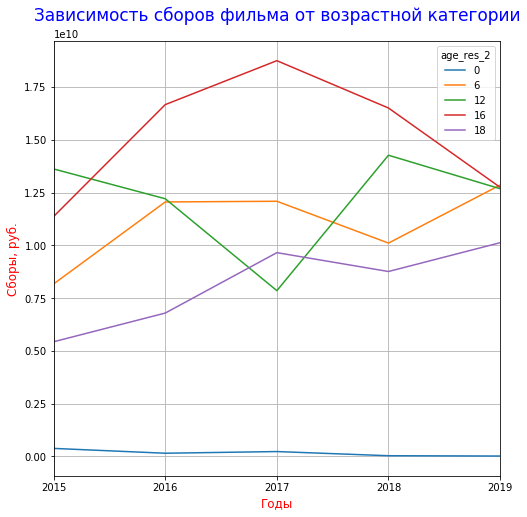

In [87]:
#построим график
data.loc[(data['year'].isna() == False) & (data['box_office'].isna() == False) & (data['year'] >=2015)].\
pivot_table(index = 'year', columns='age_res_2', values = 'box_office', aggfunc = 'sum').\
sort_index().\
plot(grid=True, figsize=(8, 8))
plt.gca().set_xticks([2015, 2016, 2017, 2018, 2019])
plt.xlabel('Годы', fontsize = 12, color = 'red')
plt.ylabel('Сборы, руб.', fontsize = 12, color = 'red')
plt.title('Зависимость сборов фильма от возрастной категории', fontsize = 17, color = 'blue', pad =20)

По графику "Зависимость сборов фильма от возрастной категории" можно отметить:
- возрастная категория "0+" - на протяжении всего периода исследования (2015-2019гг.) имела самые низкие сборы от прокатов фильмов в кинотеатрах;
- самая популярная категория "16+" в 2016-2018гг.
- 2019 год отличается примерно ровным распределением сборов между категриями "6+" - "16+".

Для большего понимания зависимости сборов от возрастной категории, рассмотрим количество фильмов, вышедших в прокат в кинотеатры, по каждой возрастной категории на протяжении исследуемого периода (2015-2019гг.).

In [88]:
#построим сводную таблицу количества фильмов в прокате по возрастной категории и по годам
data.loc[(data['year'].isna() == False) & (data['box_office'].isna() == False) & (data['year'] >=2015)].\
pivot_table(index = 'year', columns='age_res_2', values = 'box_office', aggfunc = 'count').\
sort_index()\


age_res_2,0,6,12,16,18
year,,,,,
2015,39,51,73,166,131
2016,41,70,82,181,149
2017,3,45,40,121,147
2018,5,68,67,156,178
2019,3,80,85,176,183


Text(0.5, 1.0, 'Количество фильмов от возрастной категории')

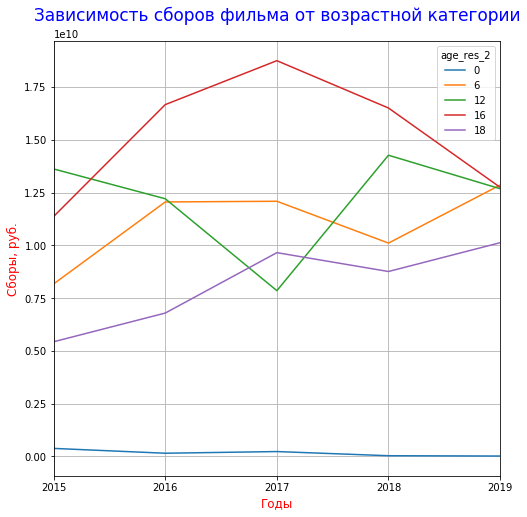

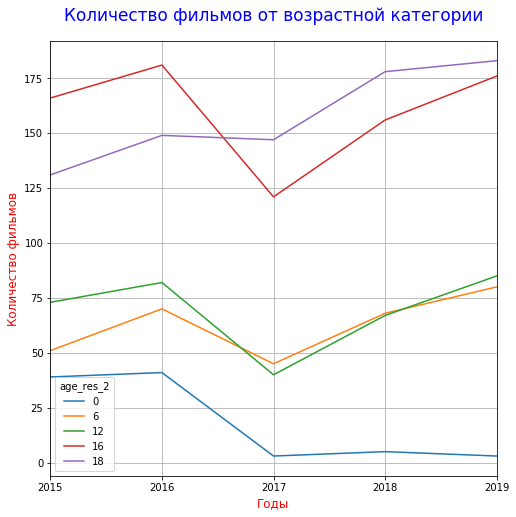

In [89]:
#график "Зависимость сборов фильма от возрастной категории"
data.loc[(data['year'].isna() == False) & (data['box_office'].isna() == False) & (data['year'] >=2015)].\
pivot_table(index = 'year', columns='age_res_2', values = 'box_office', aggfunc = 'sum').\
sort_index().\
plot(grid=True, figsize=(8, 8))
plt.gca().set_xticks([2015, 2016, 2017, 2018, 2019])
plt.xlabel('Годы', fontsize = 12, color = 'red')
plt.ylabel('Сборы, руб.', fontsize = 12, color = 'red')
plt.title('Зависимость сборов фильма от возрастной категории', fontsize = 17, color = 'blue', pad =20)

#график "Количество фильмов от возрастной категории"
data.loc[(data['year'].isna() == False) & (data['box_office'].isna() == False) & (data['year'] >=2015)].\
pivot_table(index = 'year', columns='age_res_2', values = 'box_office', aggfunc = 'count').\
sort_index().\
plot(grid=True, figsize=(8, 8))
plt.gca().set_xticks([2015, 2016, 2017, 2018, 2019])
plt.xlabel('Годы', fontsize = 12, color = 'red')
plt.ylabel('Количество фильмов', fontsize = 12, color = 'red')
plt.title('Количество фильмов от возрастной категории', fontsize = 17, color = 'blue', pad =20)

Анализируя два графика приходим к выводам:
- категория "0+" - фильмы этой категории имеют низкие сборы на протяжении 2015-2019гг. по причине их небольшого количества в прокате в кинотеатрах;
- категории от "16+" - большое количество таких фильмов в прокате отчасти объясняет большие сборы по этой категории;
- 2019 год, однако, ничем не отличается от других лет: так же мало выпущенных в прокат фильмов "0+" и больше "16+" и выше. Значит такое ровное распределение сборов между категориями "6+"-"16+" может говорить о повышении качества этих фильмов и отсюда большей посещаемости их в кинотеатрах. 

***Вывод п.3.

Исследуя данные исходной таблицы, можно сделать выводы:

I.
Самый большой выпуск фильмов отмечается в 2010 году, затем идет резкий спад, потом в течении 7 лет постоянные колебания и с 2018 года рост выпуска фильмов. Причины на данном этапе исследования таких колебаний пока не известны, здесь мы только можем констатировать факты.

Из всех данных таблицы выделили фильмы, вышедшие в прокат в кинотеатры. По таким фильмам заметен рост количества, за последние 10 лет. Было падение этого показателя в 2017 году, но в последующие годы так же он растет.

Доля фильмов, вышедших в прокат в кинотеатры так же растет на протяжении 8 лет, в 2018 году виден резкий спад, но все же к концу исследуемого периода - рост.

II.
Анализ динамики сборов от проката фильмов  показал: 
- с 2010 - 2013 гг. сборы от прокатов фильмов в кинотеатрах были очень малы, 
- резкий рост начинается с 2014 года и доходит до максимума в 2018 году.
- в 2019 году отмечается небольшое, но снижение этого показателя. 

Видимо, изменилось качество фильмов и люди стали больше ходить в кинотеатры.

III.
Провели анализ влияния возрастной категории на сумму сборов от проката фильма в кинотеатрах. Данная зависимость была рассмотрена в разрезе по годам.

Итак, можно отметить:
- возрастная категория "0+" - на протяжении всего периода исследования (2015-2019гг.) имела самые низкие сборы от прокатов фильмов в кинотеатрах;
- самая популярная категория "16+" в 2016-2018гг.
- 2019 год отличается примерно ровным распределением сборов между категриями "6+" - "16+".


Для большего понимания зависимости сборов от возрастной категории, рассмотрели динамику роста количества фильмов, вышедших в прокат в кинотеатры, по каждой возрастной категории на протяжении исследуемого периода (2015-2019гг.).

И пришли к выводам:
- категория "0+" - фильмы этой категории имеют низкие сборы на протяжении 2015-2019гг. по причине их небольшого количества в прокате в кинотеатрах;
- категории от "16+" - большое количество таких фильмов в прокате отчасти объясняет большие сборы по этой категории;
- 2019 год, однако, ничем не отличается от других лет: так же мало выпущенных в прокат фильмов "0+" и больше "16+" и выше. Значит такое ровное распределение сборов между категориями "6+"-"16+" может говорить о повышении качества этих фильмов и отсюда большей посещаемости их в кинотеатрах.


### Шаг 4. Исследуйте фильмы, которые получили государственную поддержку

На этом этапе нет конкретных инструкций и заданий — поищите интересные закономерности в данных. Посмотрите, сколько выделяют средств на поддержку кино. Проверьте, хорошо ли окупаются такие фильмы, какой у них рейтинг.

В этом пункте проведем анализ следующих показателей: 
- сумма гос. финансирования в разбивки по годам
- какая доля фильмов с гос.поддержкой вышла в прокат в разбивке по годам
- окупаемость фильмов с гос.поддержкой в разбивке по годам
- какая возрастная категория фильмов более интересна для гос. финансирования
- какой жанр фильма более интересен для гос. финансирования
- самый окупаемый жанр среди фильмов с гос.поддержкой
- какой самый успешный жанр фильмов с гос.поддержкой по рейтингу

In [90]:
data.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1,age_res_2
0,Открытый простор,221048915,2015-11-27,Художественный,"Тачстоун Пикчерз, Кобальт Пикчерз, Бикон Пикче...",США,Кевин Костнер,"Дэвид Валдес, Кевин Костнер, Джейк Эбертс",«18+» - запрещено для детей,nan,nan,nan,NaN,7.20,"боевик,драма,мелодрама",nan,nan,2015,Кевин Костнер,боевик,nan,nan,«18,18
1,Особо важное задание,111013716,2016-09-13,Художественный,"Киностудия ""Мосфильм""",СССР,Е.Матвеев,NaN,«6+» - для детей старше 6 лет,nan,nan,nan,NaN,6.60,"драма,военный",nan,nan,2016,Е.Матвеев,драма,nan,nan,«6,6
2,Особо опасен,221038416,2016-10-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18,18
3,Особо опасен,221026916,2016-06-10,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2016,Тимур Бекмамбетов,фантастика,nan,nan,«18,18
4,Особо опасен,221030815,2015-07-29,Художественный,"Юниверсал Пикчерз, Кикстарт Продакшнз, Марк Пл...",США,Тимур Бекмамбетов,"Джим Лемли, Джейсон Нетер, Марк Е.Платт, Яйн Смит",«18+» - запрещено для детей,nan,nan,nan,NaN,6.80,"фантастика,боевик,триллер",nan,nan,2015,Тимур Бекмамбетов,фантастика,nan,nan,«18,18


4.1. СУММА ГОС. ФИНАНСИРОВАНИЯ 

In [91]:
#построим сводную таблицу, по годам суммы гос. финансирования кино
data.loc[data['budget_refun'].isna() == False]\
.pivot_table(index = 'year', values = 'budget_refun', aggfunc ='sum')\
.sort_values( by='year')


,budget_refun
year,
2013,"134,347,945.00"
2014,"572,002,299.00"
2015,"3,641,541,459.00"
2016,"4,303,155,482.00"
2017,"3,183,971,662.00"
2018,"3,446,969,465.00"
2019,"4,904,000,000.00"


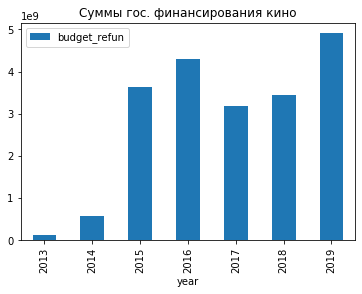

In [92]:
#построим график
data.loc[data['budget_refun'].isna() == False]\
.pivot_table(index = 'year', values = 'budget_refun', aggfunc ='sum')\
.sort_values( by='year')\
.plot(y='budget_refun', kind='bar', title=('Суммы гос. финансирования кино'))

Итак, можно отметить: 
- начиная с 2015 года заметен значительный рост гос. финансирования в кинопроизводство страны. 
- 2017 года - гос. финансирование кино падает, но на это скорее всего повлиял кризис 2017-2018гг. в России.
- 2019 год - вновь отмечен ростом финансирования государством кинопроизводсва

4.2. ДОЛЯ ФИЛЬМОВ С ГОС. ПОДДЕРЖКОЙ, КОТОРЫЕ ВЫШЛИ В ПРОКАТ В КИНОТЕАТРЫ

In [93]:
#построим срез данных: фильмы с гос.поддержкой
data_supp = data.loc[data['financing_source'].isna() == False]
display(data_supp)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1,age_res_2
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,33.37,0.00,«16,16
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,unknown,"28,140.00","26,000,000.00",2014,А.Якимчук,unknown,70.00,0.00,«12,12
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,61.27,0.11,«12,12
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,0.00,«16,16
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,62.48,0.01,«16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",2019,А.Кравчук,история,51.02,0.73,«12,12
7466,Иван Царевич и Серый Волк 4,114005019,2019-12-20,Анимационный,"ООО ""Студия анимационного кино ""Мельница""",Россия,"Д.Шмидт, К.Феоктистов","С.Сельянов, А.Боярский",«6+» - для детей старше 6 лет,"100,000,000.00",0.00,"190,000,000.00",Фонд кино,6.70,"мультфильм,приключения,семейный","501,069,235.00","100,000,000.00",2019,Д.Шмидт,мультфильм,52.63,2.64,«6,6
7474,Вторжение,111022519,2019-12-23,Художественный,"ООО ""Арт Пикчерс Студия"", ООО ""Водород 2011""",Россия,Ф.Бондарчук,"Ф.Бондарчук, М.Врубель, А.Андрющенко, Д.Рудовский",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","944,000,000.00",Фонд кино,5.70,"фантастика,боевик",nan,"500,000,000.00",2019,Ф.Бондарчук,фантастика,52.97,nan,«12,12
7476,Я свободен,111023019,2019-12-26,Художественный,"АО ""ТПО ""Киностудия им. М.Горького""",Россия,И.Северов,С.Зернов,«12+» - для детей старше 12 лет,0.00,"30,000,000.00","46,154,000.00",Министерство культуры,5.90,драма,nan,"30,000,000.00",2019,И.Северов,драма,65.00,nan,«12,12


In [94]:
#построим срез данных: фильмы с гос.поддержкой и вышедшие в прокат
data_supp_box = data_supp.loc[data_supp['box_office'].isna() == False]
display(data_supp_box)

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1,age_res_2
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,33.37,0.00,«16,16
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,unknown,"28,140.00","26,000,000.00",2014,А.Якимчук,unknown,70.00,0.00,«12,12
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,61.27,0.11,«12,12
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,0.00,«16,16
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,62.48,0.01,«16,16
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7375,Тварь,111019419,2019-11-26,Художественный,"ООО ""СОК""",Россия,О.Городецкая,"П.Зарукин, О.Филипук, Ф.Ламшин, М.Абрамов, Н.Т...",«16+» - для детей старше 16 лет,"5,000,000.00","35,000,000.00","78,422,212.00",Фонд кино,5.00,"триллер,драма","18,617,156.96","40,000,000.00",2019,О.Городецкая,триллер,51.01,0.24,«16,16
7453,Фиксики против кработов,114004819,2019-12-21,Анимационный,"АО ""Аэроплан""",Россия,"В.Бедошвили, О.Ужинов, И.Пшонкин, Д.Цыбулькин","Г.Васильев, С.Саркисов, И.Попов",«6+» - для детей старше 6 лет,"80,000,000.00","40,000,000.00","270,000,000.00",Фонд кино,7.50,"мультфильм,детский,приключения","387,590,521.72","120,000,000.00",2019,В.Бедошвили,мультфильм,44.44,1.44,«6,6
7456,Холоп,111021719,2019-12-19,Художественный,"ООО ""МЕМ-МЕДИА"" по заказу АО ""ВБД Груп""",Россия,К.Шипенко,"Э.Илоян, Д.Жалинский, В.Дусмухаметов, Т.Бадзие...",«12+» - для детей старше 12 лет,"25,000,000.00","35,000,000.00","160,000,000.00",Фонд кино,6.80,комедия,"3,073,568,690.79","60,000,000.00",2019,К.Шипенко,комедия,37.50,19.21,«12,12
7464,Союз спасения,111022019,2019-12-26,Художественный,"ЗАО ""Дирекция кино""",Россия,А.Кравчук,"А.Максимов, К.Эрнст",«12+» - для детей старше 12 лет,"100,000,000.00","400,000,000.00","980,000,000.00",Фонд кино,6.00,"история,биография,драма","717,703,185.53","500,000,000.00",2019,А.Кравчук,история,51.02,0.73,«12,12


In [95]:
#построим сводную таблицу, по годам количество фильмов с гос.поддержкой
data_supp_year = data_supp.pivot_table(index = 'year', values = 'financing_source', aggfunc ='count')\
.sort_values( by='year')
display(data_supp_year)

,financing_source
year,
2013,2
2014,16
2015,84
2016,61
2017,41
2018,56
2019,70


In [96]:
#построим сводную таблицу, по годам количество фильмов с гос.поддержкой, вышедшие в прокат
data_supp_box_year = data_supp_box.pivot_table(index = 'year', values = 'box_office', aggfunc ='count')\
.sort_values( by='year')
display(data_supp_box_year)

,box_office
year,
2013,2
2014,16
2015,83
2016,60
2017,39
2018,56
2019,60


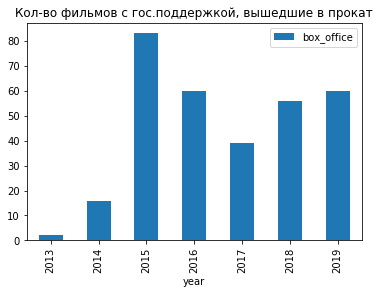

In [97]:
data_supp_box_year = data_supp_box.pivot_table(index = 'year', values = 'box_office', aggfunc ='count')\
.sort_values( by='year')
data_supp_box_year.plot(y='box_office', kind='bar', title=('Кол-во фильмов с гос.поддержкой, вышедшие в прокат'))

Можно отметить логичную закономерность: в 2015 году ранее в анализе был отмечен рост гос.финансирования кино - количество фильмов с гос.поддержкой тоже значительно выросло в этот год.

In [98]:
#объединим  data_supp_year и  data_supp_box_year по столбцу 'year' в таблицу supp_box_year
supp_box_year = data_supp_year.merge(data_supp_box_year, on='year', how='left')
display(supp_box_year)

,financing_source,box_office
year,,
2013,2,2
2014,16,16
2015,84,83
2016,61,60
2017,41,39
2018,56,56
2019,70,60


In [99]:
#создадим новый стобец, который считает долю фильмов с гос.поддержкой, которые вышли в прокат
supp_box_year['%%'] = supp_box_year['box_office'] / supp_box_year['financing_source'] * 100
display(supp_box_year)

,financing_source,box_office,%%
year,,,
2013,2,2,100.00
2014,16,16,100.00
2015,84,83,98.81
2016,61,60,98.36
2017,41,39,95.12
2018,56,56,100.00
2019,70,60,85.71


Согласно данным сводной таблицы видно, что почти все фильмы, которые имеют государственное финансирование, вышли в прокат в кинотеатры. Немного отличаются от этого вывода данные за 2019 год, но скорее всего, что ни все фильмы успели выйти в прокат и это случится в ближайшее время.

4.3. ОКУПАЕМОСТЬ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ 

Для анализа окупаемости фильмов с гос.поддержкой рассмотрим этот показатель в разбивки по годам, посчитав медианное значение окупаемости по таким фильмам.

In [100]:
#построим сводную таблицу окупаемости фильмов с гос.поддержкой по годам 
data_supp.pivot_table(index = 'year', values = 'roi', aggfunc ='median')\
.sort_values( by='year')



,roi
year,
2013,0.06
2014,0.07
2015,0.11
2016,0.15
2017,0.50
2018,0.35
2019,0.23


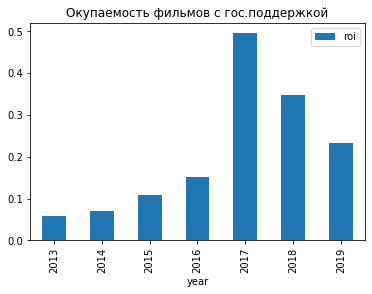

In [101]:
#построим столбчату диаграмму окупаемости фильмов с гос.поддержкой по годам 
data_supp.pivot_table(index = 'year', values = 'roi', aggfunc ='median')\
.sort_values( by='year').plot(y='roi', kind='bar', title=('Окупаемость фильмов с гос.поддержкой'))

Согласно графика "Окупаемость фильмов с гос.поддержкой" видно, что окупаемость таких фильмов небольшая: 50% - это самая большая доля окупаемости таких фильмов,которая отмечается в 2017 году. 

4.4. КАКАЯ ВОЗРАСТНАЯ КАТЕГОРИЯ БОЛЕЕ ИНТЕРЕСНА ДЛЯ ГОС.ФИНАНСИРОВАНИЯ

In [102]:
data_supp.head()

,title,puNumber,show_start_date,type,film_studio,production_country,director,producer,age_restriction,refundable_support,nonrefundable_support,budget,financing_source,ratings,genres,box_office,budget_refun,year,dir,genr,refund_sup,roi,age_res_1,age_res_2
1281,Пока еще жива,111005313,2013-10-11,Художественный,"АНО содействия развитию кинематографии ""Ангел-...",Россия,А.Атанесян,"А.Атанесян, М.Бабаханов, Р.Бутко",«16+» - для детей старше 16 лет,0.00,"26,500,000.00","79,411,900.00",Министерство культуры,8.10,"драма,мелодрама","365,353.60","26,500,000.00",2013,А.Атанесян,драма,33.37,0.00,«16,16
1448,Бесславные придурки,111003314,2014-03-28,Художественный,"ООО ""Компания ""АТК-Студио""",Россия,А.Якимчук,А.Тютрюмов,«12+» - для детей старше 12 лет,0.00,"26,000,000.00","37,142,857.00",Министерство культуры,nan,unknown,"28,140.00","26,000,000.00",2014,А.Якимчук,unknown,70.00,0.00,«12,12
1498,Невидимки,111004213,2013-09-10,Художественный,"ООО ""Компания ""РЕАЛ-ДАКОТА""",Россия,"Р.Давлетьяров, С.Комаров","Р.Давлетьяров, А.Котелевский, А.Олейников",«12+» - для детей старше 12 лет,0.00,"107,847,945.00","176,023,490.00",Фонд кино,5.30,"комедия,фантастика","19,957,031.50","107,847,945.00",2013,Р.Давлетьяров,комедия,61.27,0.11,«12,12
1524,БЕРЦЫ,111004314,2014-05-05,Художественный,"ООО ""Студия ""Пассажир""",Россия,Е.Миндадзе (псевдоним Катя Шагалова),Л.Антонова,«16+» - для детей старше 16 лет,0.00,"28,000,000.00","40,574,140.00",Министерство культуры,4.20,драма,"55,917.50","28,000,000.00",2014,Е.Миндадзе (псевдоним Катя Шагалова),драма,69.01,0.00,«16,16
1792,Братья Ч,111004414,2014-04-23,Художественный,"ООО ""Студия ""Пассажир""",Россия,М.Угаров,"А.Миндадзе, Л.Антонова",«16+» - для детей старше 16 лет,0.00,"25,000,000.00","40,015,122.00",Министерство культуры,6.40,драма,"232,100.00","25,000,000.00",2014,М.Угаров,драма,62.48,0.01,«16,16


In [103]:
#построим сводную таблицу количества фильмов с гос.поддержкой по возрастным категриям 
data_supp.pivot_table(index = 'age_res_2', values = 'financing_source', aggfunc ='count')\
.sort_values( by='age_res_2')


,financing_source
age_res_2,
0,8
6,64
12,106
16,124
18,28


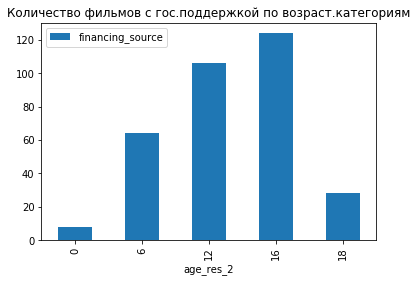

In [104]:
#построим столбчату диаграмму количества фильмов с гос.поддержкой по возрастным категориям
data_supp.pivot_table(index = 'age_res_2', values = 'financing_source', aggfunc ='count')\
.sort_values( by='age_res_2')\
.plot(y='financing_source', kind='bar', title=('Количество фильмов с гос.поддержкой по возраст.категориям'))

Как видим из диаграммы, что для гос. финансирования в приоритете фильмы для аудитории возраста "12+"/"16+". Фильмы "0+" так же остаются не инетерсными для финансирования.

Дополним этот пункт исследования анализом окупаемости фильмов с гос.поддержкой в разбивке по возрастным категориям.

(array([0, 1, 2, 3, 4]), <a list of 5 Text xticklabel objects>)

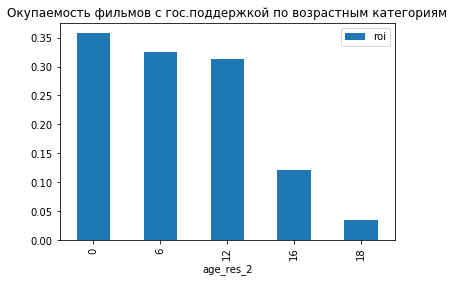

In [105]:
#построим столбчату диаграмму окупаемости фильмов с гос.поддержкой 
#в разбивке по возрастным категориям 
data_supp.pivot_table(index = 'age_res_2', values = 'roi', aggfunc ='median')\
.sort_values( by='age_res_2').plot(y='roi', kind='bar', \
title=('Окупаемость фильмов с гос.поддержкой по возрастным категориям'))
plt.xticks(rotation='vertical')

Рассмотрев окупаемость по возрастным категория приходим к выводу, что фильмы категории "0+" самые окупаемые. Может стоило бы увеличить финансирование в эти фильмы?

4.5. КАКОЙ ЖАНР ФИЛЬМА БОЛЕЕ ИНТЕРЕСЕН ДЛЯ ГОС.ФИНАНСИРОВАНИЯ

In [106]:
#построим сводную таблицу количества фильмов с гос.поддержкой в разбивке по жанрам
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'financing_source', aggfunc ='count').sort_values( by='financing_source')


,financing_source
genr,
реальное ТВ,1
биография,3
криминал,3
спорт,3
детский,4
история,4
мюзикл,4
детектив,5
боевик,6


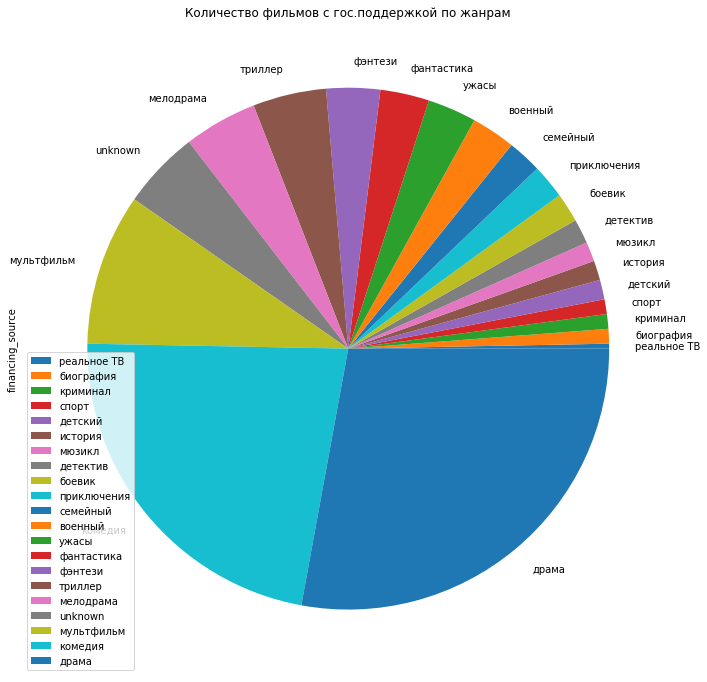

In [107]:
#построим круговую диаграмму 
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'financing_source', aggfunc ='count').sort_values( by='financing_source')\
.plot(y='financing_source', kind='pie', \
title=('Количество фильмов с гос.поддержкой по жанрам'), figsize=(12, 12))

Из диаграммы "Количество фильмов с гос.поддержкой по жанрам" очевидное преимущество имеют фильмы жанра драма и комедия, именно они более интересны для финансирования государственными органами. И самый не интересный жанр по этому показателю - реальное ТВ.

4.6. САМЫЙ ОКУПАЕМЫЙ ЖАНР СРЕДИ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ

In [108]:
#построим сводную таблицу окупаемости фильмов с гос.поддержкой в разбивке по жанрам
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'roi', aggfunc ='median').sort_values( by='roi')


,roi
genr,
unknown,0.01
мелодрама,0.02
детский,0.03
драма,0.06
триллер,0.06
детектив,0.06
мюзикл,0.13
военный,0.19
криминал,0.23


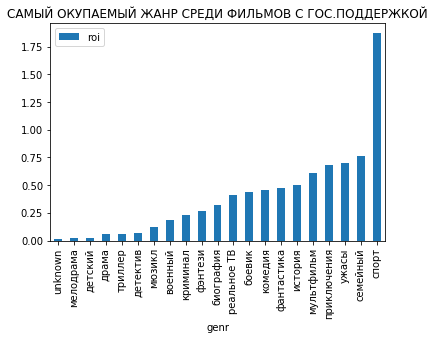

In [109]:
#построим столбчатую диаграмму
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'roi', aggfunc ='median').sort_values( by='roi')\
.plot(y='roi', kind='bar', title=('САМЫЙ ОКУПАЕМЫЙ ЖАНР СРЕДИ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ'))

Согласно анализа диаграммы "САМЫЙ ОКУПАЕМЫЙ ЖАНР СРЕДИ ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ" получили, что явный лидер в этом показатели - жанр "спорт". Скорее всего в этот жанр мало финансируют, поэтму и процент аккупаемости такой высокий.

4.6. КАКОЙ САМЫЙ УСПЕШНЫЙ ЖАНР ФИЛЬМОВ С ГОС.ПОДДЕРЖКОЙ ПО РЕЙТИНГУ

In [110]:
#построим сводную таблицу среднего рейтинга фильмов с гос.поддержкой в разбивке по жанрам
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'ratings', aggfunc ='median').sort_values( by='ratings')

,ratings
genr,
семейный,4.80
ужасы,5.10
триллер,5.60
реальное ТВ,5.60
приключения,5.70
комедия,5.75
история,5.90
фантастика,5.95
мелодрама,6.20


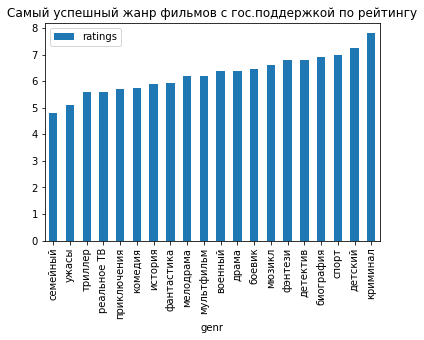

In [111]:
#построим столбчату диаграмму количества фильмов с гос.поддержкой по возрастным категориям
data_supp.loc[data_supp['genr'] != '0']\
.pivot_table(index = 'genr', values = 'ratings', aggfunc ='median').sort_values( by='ratings')\
.plot(y='ratings', kind='bar', title=('Самый успешный жанр фильмов с гос.поддержкой по рейтингу'))

Самый высокий рейтинг среди фильмов с гос.поддержкой, исходя из предоставленных данных, заслуживает жанр "криминал", а самый низкий - "семейный". Как говорится: "сколько людей - столько и мнений", которые не зависят даже от суммы вложенных средств государством в эти фильмы.

*** Вывод п.4.

Проведя исследовательский анализ фильмов с гос.поддержкой, можно сделать выводы по следующим показателям:

I.
Суммы гос.финансирования : 
- начиная с 2015 года заметен значительный рост гос. финансирования в кинопроизводство страны. 
- 2017 года - гос. финансирование кино падает, но на это скорее всего повлиял кризис 2017-2018гг. в России.
- 2019 год - вновь отмечен ростом финансирования государством кинопроизводсва

Так же: в 2015 году отмечен рост не только сумм гос.финансирования кино, но и рост в этом году количества фильмов с гос.поддержкой.

II.
Согласно исследуемым данным, можно сделать вывод, что почти все фильмы, которые имеют государственное финансирование, вышли в прокат в кинотеатры. Немного отличаются от этого вывода данные за 2019 год, но скорее всего, что ни все фильмы успели выйти в прокат и это случится в ближайшее время.


III.
Окупаемость таких фильмов небольшая: 50% - это самая большая доля окупаемости таких фильмов, которая отмечается в 2017 году. 

IV.
Для гос. финансирования в приоритете фильмы для аудитории возраста "12+"/"16+". Фильмы "0+" остаются мало интерсными для финансирования. Однако, рассмотрев окупаемость фильмов с гос.поддержкой в разбивке по возрастным категория, пришли к выводу, что самая высокая окупаемость у фильмов категории "0+". Наверное, нужно пересмотреть приоритеты финансирования.

V.
Очевидное преимущество имеют фильмы жанра драма и комедия, именно в них вложены большие суммы государственными органами. И самый не интересный жанр по этому показателю - реальное ТВ.

VI.
Явный лидер среди самых окупаемых жанров фильмов с гос.поддержкой - жанр "спорт". Скорее всего в этот жанр мало вложено средств, поэтому и процент окупаемости такой высокий.

VII.
Самый высокий рейтинг среди фильмов с гос.поддержкой, исходя из предоставленных данных, заслуживает жанр "криминал", а самый низкий - "семейный". Как говорится: "сколько людей - столько и мнений", которые не зависят даже от суммы вложенных средств государством в эти фильмы.



### Шаг 5. Напишите общий вывод

Нами был изучен рынок российского кинопроката. Мы постарались выявить закономерности и отметить текущие тренды киноиндустрии. Особое внимание было уделено фильмам, которые получили государственную поддержку.


I.

Исследуя данные исходной таблицы в целом, можно сделать выводы:
1) Самый большой выпуск фильмов отмечается в 2010 году, затем идет резкий спад, потом в течении 7 лет постоянные колебания и с 2018 года рост выпуска фильмов. Причины на данном этапе исследования таких колебаний пока не известны, здесь мы только можем констатировать факты.
Из всех данных таблицы выделили фильмы, вышедшие в прокат в кинотеатры. По таким фильмам заметен рост количества, за последние 10 лет. Было падение этого показателя в 2017 году, но в последующие годы так же он растет.
Доля фильмов, вышедших в прокат в кинотеатры так же растет на протяжении 8 лет, в 2018 году виден резкий спад, но все же к концу исследуемого периода - рост.

2) Анализ динамики сборов от проката фильмов показал:
* с 2010 - 2013 гг. сборы от прокатов фильмов в кинотеатрах были очень малы,
* резкий рост начинается с 2014 года и доходит до максимума в 2018 году.
* в 2019 году отмечается небольшое, но снижение этого показателя.
Видимо, изменилось качество фильмов и люди стали больше ходить в кинотеатры.

3) Провели анализ влияния возрастной категории на сумму сборов от проката фильма в кинотеатрах. Данная зависимость была рассмотрена в разрезе по годам.
Итак, можно отметить:
* возрастная категория "0+" - на протяжении всего периода исследования (2015-2019гг.) имела самые низкие сборы от прокатов фильмов в кинотеатрах;
* самая популярная категория "16+" в 2016-2018гг.
* 2019 год отличается примерно ровным распределением сборов между категриями "6+" - "16+".
Для большего понимания зависимости сборов от возрастной категории, рассмотрели динамику роста количества фильмов, вышедших в прокат в кинотеатры, по каждой возрастной категории на протяжении исследуемого периода (2015-2019гг.).
И пришли к выводам:
* категория "0+" - фильмы этой категории имеют низкие сборы на протяжении 2015-2019гг. по причине их небольшого количества в прокате в кинотеатрах;
* категории от "16+" - большое количество таких фильмов в прокате отчасти объясняет большие сборы по этой категории;
* 2019 год, однако, ничем не отличается от других лет: так же мало выпущенных в прокат фильмов "0+" и больше "16+" и выше. Значит такое ровное распределение сборов между категориями "6+"-"16+" может говорить о повышении качества этих фильмов и отсюда большей посещаемости их в кинотеатрах.

II.

Проведя исследовательский анализ фильмов с гос.поддержкой, можно сделать выводы по следующим показателям:
1) Суммы гос.финансирования :
* начиная с 2015 года заметен значительный рост гос. финансирования в кинопроизводство страны.
* 2017 года - гос. финансирование кино падает, но на это скорее всего повлиял кризис 2017-2018гг. в России.
* 2019 год - вновь отмечен ростом финансирования государством кинопроизводсва
Так же: в 2015 году отмечен рост не только сумм гос.финансирования кино, но и рост в этом году количества фильмов с гос.поддержкой.

2) Согласно исследуемым данным, можно сделать вывод, что почти все фильмы, которые имеют государственное финансирование, вышли в прокат в кинотеатры. Немного отличаются от этого вывода данные за 2019 год, но скорее всего, что ни все фильмы успели выйти в прокат и это случится в ближайшее время.

3) Окупаемость таких фильмов небольшая: 50% - это самая большая доля окупаемости таких фильмов, которая отмечается в 2017 году.

4) Для гос. финансирования в приоритете фильмы для аудитории возраста "12+"/"16+". Фильмы "0+" остаются мало интерсными для финансирования. Хотя имеет самый высокую окупаемость. Что заставляет задуматься о приоритетах финансирования.

5) Очевидное преимущество имеют фильмы жанра драма и комедия, именно в них вложены большие суммы государственными органами. И самый не интересный жанр по этому показателю - реальное ТВ.

6) Явный лидер среди самых окупаемых жанров фильмов с гос.поддержкой - жанр "спорт". Скорее всего в этот жанр мало вложено средств, поэтому и процент окупаемости такой высокий.

7) Самый высокий рейтинг среди фильмов с гос.поддержкой, исходя из предоставленных данных, заслуживает жанр "криминал", а самый низкий - "семейный". Как говорится: "сколько людей - столько и мнений", которые не зависят даже от суммы вложенных средств государством в эти фильмы.





